In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Dados observados
df_cor = pd.read_pickle('../dados_meteorologicos/dez2017_AR.pk')
df_inmet = pd.read_pickle('../dados_meteorologicos/dez2017_INMET.pk')

# Dados do WRF

In [3]:
# abre arquivo txt gerado pelo grads
def load_output(arquiv):
    txt = open(arquiv,'r').readlines()
    array = np.array([txt[i].split() for i in range(len(txt))]).flatten()
    lista = []
    for i in range(len(array)):
        for x in range(len(array[i])):
            d = float(array[i][x])    
            lista.append(d)
    data= np.array(lista).ravel()
    return data 



## UCM single layer

In [4]:
''' se no grads utilizar  

fprintf.gs t2 santa_cruz_wrf1.txt %g 1

use np.loadtxt, contrario load_output'''
altobv = np.loadtxt('../WRF/altodaboavista_wrf1.txt')
fundao = np.loadtxt('../WRF/fundao_wrf1.txt')
guaratiba = np.loadtxt('../WRF/guaratiba_wrf1.txt')
iraja = np.loadtxt('../WRF/iraja_wrf1.txt')
jardim = np.loadtxt('../WRF/jardim_botanico_wrf1.txt')
riocentro = np.loadtxt('../WRF/riocentro_wrf1.txt')
santacruz = np.loadtxt('../WRF/santa_cruz_wrf1.txt')
copacabana = load_output('../WRF/copacaba_wrf1.txt')
ecologia = load_output('../WRF/ecologia_wrf1.txt')
jacarepagua = load_output('../WRF/jacarepagua_wrf1.txt')
marambaia = load_output('../WRF/marambaia_wrf1.txt')
xerem = load_output('../WRF/xerem_wrf1.txt')

In [5]:
df_wrf = pd.DataFrame({'AltoBV':altobv,'Fundao':fundao,'Guaratiba':guaratiba,'Iraja':iraja,
                      'JardimB':jardim, 'RioCentro':riocentro,'SantaCruz':santacruz,
                      'FCopacabana':copacabana, 'Ecologia': ecologia, 'Jacarepagua':jacarepagua,
                      'Marambaia': marambaia, 'Xerem': xerem})

In [6]:
df_wrf.SantaCruz.iloc[28]

297.95299999999997

In [67]:
df_wrf.index =pd.DatetimeIndex(start = '2017-12-15 21:00:00',periods = len(df_wrf),freq = '1H')

/home/pensario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


In [8]:
# convertendo para graus celsius
df_wrf = df_wrf.apply(lambda x: x - 273.15, axis =0 )

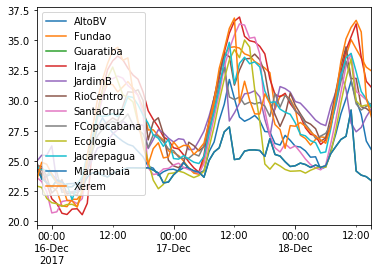

In [9]:
df_wrf.plot()

# Comparando os dados

In [68]:
df_cor = df_cor.loc['2017-12-16 21:00:00': '2017-12-18 15:00:00']
df_inmet = df_inmet.loc['2017-12-15 21:00:00': '2017-12-18 15:00:00']

In [11]:
df_cor = df_cor.resample('H').mean()

In [12]:
df_cor.inde = pd.DatetimeIndex(start = '2017-12-15 23:00:00',
                               periods = len(df_cor),freq = '1H')

/home/pensario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  
/home/pensario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


# $R^2$

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2 = pd.DataFrame({
    'AltoBV':(np.corrcoef(df_cor.alto_da_boa_vista,df_wrf.AltoBV)[0,1])**2,
    #'Fundao':(np.corrcoef(fundao.temperatura,df_wrf.Fundao)[0,1])**2,
    'FCopacabana':(np.corrcoef(df_inmet.f_copacabana,df_wrf.FCopacabana)[0,1])**2,
    'Guaratiba': (np.corrcoef(df_cor.guaratiba,df_wrf.Guaratiba)[0,1])**2,
    'Iraja': (np.corrcoef(df_cor.iraja,df_wrf.Iraja)[0,1])**2,
    'Jacarepagua': (np.corrcoef(df_inmet.jacarapagua,df_wrf.Jacarepagua)[0,1])**2,
    'JardimBotanico': (np.corrcoef(df_cor.jardim_botanico, df_wrf.JardimB)[0,1])**2,
    'Marambaia': (np.corrcoef(df_inmet.marambaia, df_wrf.Marambaia)[0,1])**2,
    'Riocentro': (np.corrcoef(df_cor.riocentro, df_wrf.RioCentro)[0,1])**2,
    'SantaCruz':(np.corrcoef(df_cor.santa_cruz, df_wrf.SantaCruz)[0,1])**2,
    'Xerem': (np.corrcoef(df_inmet.xerem, df_wrf.Xerem)[0,1])**2,
    'Ecologia': (np.corrcoef(df_inmet.ecologia, df_wrf.Ecologia)[0,1])**2}, index = ['$R^2$'] )

r2_SL = r2.transpose()


In [15]:
r2_SL

,$R^2$
AltoBV,0.794305
FCopacabana,0.757937
Guaratiba,0.578090
Iraja,0.759080
Jacarepagua,0.472895
JardimBotanico,0.578223
Marambaia,0.628901
Riocentro,0.787568
SantaCruz,0.781323
Xerem,0.694301


## Plotando os resultados 

In [16]:
def plot_g(x,y,estacao):
    x = x
    y = y
    plt.plot(x,y,'k.')
    z = np.polyfit(x, y, 1)
    f = np.poly1d(z)
    plt.xlabel('Observado  (ºC)')
    plt.ylabel('Estimado (ºC)')
    plt.title(estacao)
    plt.tight_layout()
    plt.plot(x, f(x),'r--')
    #print ("y=%.6fx+%.6f"%(z[0],z[1]))


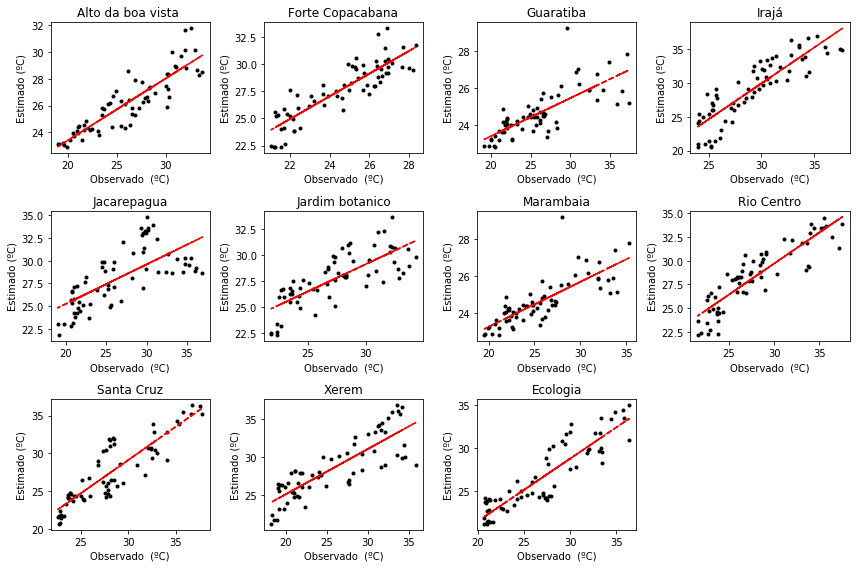

In [17]:
plt.figure(figsize=(12,8))

plt.subplot(3,4,1)
x = df_cor.alto_da_boa_vista
y = df_wrf.AltoBV
plot_g(x,y,'Alto da boa vista ')

plt.subplot(3,4,2)
x = df_inmet.f_copacabana
y = df_wrf.FCopacabana
plot_g(x,y, 'Forte Copacabana')

plt.subplot(3,4,3)
x = df_cor.guaratiba
y = df_wrf.Guaratiba
plot_g(x,y, 'Guaratiba')

plt.subplot(3,4,4)
x = df_cor.iraja
y = df_wrf.Iraja
plot_g(x,y, 'Irajá')

plt.subplot(3,4,5)
x = df_inmet.jacarapagua
y = df_wrf.Jacarepagua
plot_g(x,y,'Jacarepagua')

plt.subplot(3,4,6)
x = df_cor.jardim_botanico
y = df_wrf.JardimB
plot_g(x,y, 'Jardim botanico')

plt.subplot(3,4,7)
x = df_inmet.marambaia
y = df_wrf.Marambaia
plot_g(x,y, 'Marambaia')

plt.subplot(3,4,8)
x = df_cor.riocentro
y = df_wrf.RioCentro
plot_g(x,y, 'Rio Centro')

plt.subplot(3,4,9)
x = df_cor.santa_cruz
y = df_wrf.SantaCruz
plot_g(x,y, 'Santa Cruz')

plt.subplot(3,4,10)
x = df_inmet.xerem
y = df_wrf.Xerem
plot_g(x,y, 'Xerem')


plt.subplot(3,4,11)
x = df_inmet.ecologia
y = df_wrf.Ecologia
plot_g(x,y, 'Ecologia')


# -----------------------------------------------------------------------------------------------------------


# UCM multilayer


# -----------------------------------------------------------------------------------------------------------

In [18]:
''' se no grads utilizar  

fprintf.gs t2 santa_cruz_wrf1.txt %g 1

use np.loadtxt, contrario load_output'''
altobv = np.loadtxt('../WRF/altodaboavista_wrf2.txt')
fundao = np.loadtxt('../WRF/fundao_wrf2.txt')
guaratiba = np.loadtxt('../WRF/guaratiba_wrf2.txt')
iraja = np.loadtxt('../WRF/iraja_wrf2.txt')
jardim = np.loadtxt('../WRF/jardim_botanico_wrf2.txt')
riocentro = np.loadtxt('../WRF/riocentro_wrf2.txt')
santacruz = np.loadtxt('../WRF/santa_cruz_wrf2.txt')
copacabana = np.loadtxt('../WRF/copacaba_wrf2.txt')
ecologia = np.loadtxt('../WRF/ecologia_wrf2.txt')
jacarepagua = np.loadtxt('../WRF/jacarepagua_wrf2.txt')
marambaia = np.loadtxt('../WRF/marambaia_wrf2.txt')
xerem = np.loadtxt('../WRF/xerem_wrf2.txt')

In [19]:
df_wrf2 = pd.DataFrame({'AltoBV':altobv,'Fundao':fundao,'Guaratiba':guaratiba,'Iraja':iraja,
                      'JardimB':jardim, 'RioCentro':riocentro,'SantaCruz':santacruz,
                      'FCopacabana':copacabana, 'Ecologia': ecologia, 'Jacarepagua':jacarepagua,
                      'Marambaia': marambaia, 'Xerem': xerem})

In [20]:
df_wrf2.index =pd.DatetimeIndex(start = '2017-12-15 21:00:00',periods = len(df_wrf2),freq = '1H')

/home/pensario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


In [21]:
# convertendo para graus celsius
df_wrf2 = df_wrf2.apply(lambda x: x - 273.15, axis =0 )

# WRF 

In [22]:
''' se no grads utilizar  

fprintf.gs t2 santa_cruz_wrf1.txt %g 1

use np.loadtxt, contrario load_output'''

altobv = np.loadtxt('../WRF/wrf3/altodaboavista_wrf3.txt')
fundao = np.loadtxt('../WRF/wrf3/fundao_wrf3.txt')
guaratiba = np.loadtxt('../WRF/wrf3/guaratiba_wrf3.txt')
iraja = np.loadtxt('../WRF/wrf3/iraja_wrf3.txt')
jardim = np.loadtxt('../WRF/wrf3/jardimbotanico_wrf3.txt')
riocentro = np.loadtxt('../WRF/wrf3/riocentro_wrf3.txt')
santacruz = np.loadtxt('../WRF/wrf3/santacruz_wrf3.txt')
copacabana = np.loadtxt('../WRF/wrf3/copacabana_wrf3.txt')
ecologia = np.loadtxt('../WRF/wrf3/ecologia_wrf3.txt')
jacarepagua = np.loadtxt('../WRF/wrf3/jacarepagua_wrf3.txt')
marambaia = np.loadtxt('../WRF/wrf3/marambaia_wrf3.txt')
xerem = np.loadtxt('../WRF/wrf3/xerem_wrf3.txt')

In [23]:
df_wrf3 = pd.DataFrame({'AltoBV':altobv,'Fundao':fundao,'Guaratiba':guaratiba,'Iraja':iraja,
                      'JardimB':jardim, 'RioCentro':riocentro,'SantaCruz':santacruz,
                      'FCopacabana':copacabana, 'Ecologia': ecologia, 'Jacarepagua':jacarepagua,
                      'Marambaia': marambaia, 'Xerem': xerem})

In [24]:
df_wrf3.index =pd.DatetimeIndex(start = '2017-12-15 21:00:00',periods = len(df_wrf3),
                                freq = '1H')

/home/pensario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [25]:
# convertendo para graus celsius
df_wrf3 = df_wrf3.apply(lambda x: x - 273.15, axis =0 )

# Comparando os dados

In [26]:
#df_cor = df_cor.loc['2017-12-16 00:00:00': '2017-12-18 18:00:00']
#df_inmet = df_inmet.loc['2017-12-16 00:00:00': '2017-12-18 18:00:00']

In [24]:
df_cor = df_cor.resample('H').mean()

In [ ]:
# # cor

# plt.figure(figsize=(10,6))
# plt.subplot(2,3,1)
# plt.title('Alto da Boa Vista')
# df_cor.alto_da_boa_vista.plot(label='Observado')
# df_wrf2.AltoBV.plot(label='WRF/UCM')
# plt.legend()
# plt.tight_layout()
# plt.grid()


# plt.subplot(2,3,2)
# plt.title('Guaratiba')
# df_cor.guaratiba.plot(label='Observado')
# df_wrf2.Guaratiba.plot(label='WRF/UCM')
# plt.legend()
# plt.tight_layout()
# plt.grid()

# plt.subplot(2,3,3)
# plt.title('Iraja')
# df_cor.iraja.plot(label='Observado')
# df_wrf2.Iraja.plot(label='WRF/UCM')
# plt.legend()
# plt.tight_layout()
# plt.grid()

# plt.subplot(2,3,4)
# plt.title('Jardim Botanico')
# df_cor.jardim_botanico.plot(label='Observado')
# df_wrf2.JardimB.plot(label='WRF/UCM')
# plt.legend()
# plt.tight_layout()
# plt.grid()

# plt.subplot(2,3,5)
# plt.title('Riocentro')
# df_cor.riocentro.plot(label='Observado')
# df_wrf2.RioCentro.plot(label='WRF/UCM')
# plt.legend()
# plt.tight_layout()
# plt.grid()

# plt.subplot(2,3,6)
# plt.title('Santa cruz')
# df_cor.santa_cruz.plot(label='Observado')
# df_wrf2.SantaCruz.plot(label='WRF/UCM')
# plt.legend()
# plt.tight_layout()
# plt.grid()

In [ ]:
# # INMET
# plt.figure(figsize=(8,6))
# plt.subplot(2,2,1)
# plt.title('Forte Copabana')
# df_inmet.f_copacabana.plot(label='Observado')
# df_wrf.FCopacabana.plot(label='WRF/UCM')
# plt.legend()
# plt.tight_layout()
# plt.grid()


# plt.subplot(2,2,2)
# plt.title('Jacarepagua')
# df_inmet.jacarapagua.plot(label='Observado')
# df_wrf.Jacarepagua.plot(label='WRF/UCM')
# plt.legend()
# plt.tight_layout()
# plt.grid()

# plt.subplot(2,2,3)
# plt.title('Marambaia')
# df_inmet.marambaia.plot(label='Observado')
# df_wrf.Marambaia.plot(label='WRF/UCM')
# plt.legend()
# plt.tight_layout()
# plt.grid()

# plt.subplot(2,2,4)
# plt.title('Xerem')
# df_inmet.xerem.plot(label='Observado')
# df_wrf.Xerem.plot(label='WRF/UCM')
# plt.legend()
# plt.tight_layout()
# plt.grid()



# $R^2$

In [27]:
r2 = pd.DataFrame({
    'AltoBV':(np.corrcoef(df_cor.alto_da_boa_vista,df_wrf2.AltoBV)[0,1])**2,
    'FCopacabana':(np.corrcoef(df_inmet.f_copacabana,df_wrf2.FCopacabana)[0,1])**2,
    'Guaratiba': (np.corrcoef(df_cor.guaratiba,df_wrf2.Guaratiba)[0,1])**2,
    'Iraja': (np.corrcoef(df_cor.iraja,df_wrf2.Iraja)[0,1])**2,
    'Jacarepagua': (np.corrcoef(df_inmet.jacarapagua,df_wrf2.Jacarepagua)[0,1])**2,
    'JardimBotanico': (np.corrcoef(df_cor.jardim_botanico, df_wrf2.JardimB)[0,1])**2,
    'Marambaia': (np.corrcoef(df_inmet.marambaia, df_wrf2.Marambaia)[0,1])**2,
    'Riocentro': (np.corrcoef(df_cor.riocentro, df_wrf2.RioCentro)[0,1])**2,
    'SantaCruz':(np.corrcoef(df_cor.santa_cruz, df_wrf2.SantaCruz)[0,1])**2,
    'Xerem': (np.corrcoef(df_inmet.xerem, df_wrf2.Xerem)[0,1])**2,
    'Ecologia': (np.corrcoef(df_inmet.ecologia, df_wrf2.Ecologia)[0,1])**2},
    index = ['$R^2$'] )

r2_ML = r2.transpose()


In [28]:
r2_score(df_inmet.xerem, df_wrf2.Xerem)

0.44468724833161455

## WRF3

In [29]:
r2_c = pd.DataFrame({
    'AltoBV':(np.corrcoef(df_cor.alto_da_boa_vista,df_wrf3.AltoBV)[0,1])**2,
    'FCopacabana':(np.corrcoef(df_inmet.f_copacabana,df_wrf3.FCopacabana)[0,1])**2,
    'Guaratiba': (np.corrcoef(df_cor.guaratiba,df_wrf3.Guaratiba)[0,1])**2,
    'Iraja': (np.corrcoef(df_cor.iraja,df_wrf3.Iraja)[0,1])**2,
    'Jacarepagua': (np.corrcoef(df_inmet.jacarapagua,df_wrf3.Jacarepagua)[0,1])**2,
    'JardimBotanico': (np.corrcoef(df_cor.jardim_botanico, df_wrf3.JardimB)[0,1])**2,
    'Marambaia': (np.corrcoef(df_inmet.marambaia, df_wrf3.Marambaia)[0,1])**2,
    'Riocentro': (np.corrcoef(df_cor.riocentro, df_wrf3.RioCentro)[0,1])**2,
    'SantaCruz':(np.corrcoef(df_cor.santa_cruz, df_wrf3.SantaCruz)[0,1])**2,
    'Xerem': (np.corrcoef(df_inmet.xerem, df_wrf3.Xerem)[0,1])**2,
     'Ecologia': (np.corrcoef(df_inmet.ecologia, df_wrf3.Ecologia)[0,1])**2},
    index = ['$R^2$'] )

r2_WRF = r2_c.transpose()


In [30]:
r2_score(df_inmet.xerem, df_wrf3.Xerem)

0.44234406295525486

In [31]:
coefdeterm = pd.concat([r2_SL, r2_WRF],axis=1)
coefdeterm.columns = ['WRF_SL','WRF']

In [32]:
coefdeterm

,WRF_SL,WRF
AltoBV,0.794305,0.790778
FCopacabana,0.757937,0.196233
Guaratiba,0.578090,0.547770
Iraja,0.759080,0.757960
Jacarepagua,0.472895,0.480990
JardimBotanico,0.578223,0.663447
Marambaia,0.628901,0.610965
Riocentro,0.787568,0.826242
SantaCruz,0.781323,0.785144
Xerem,0.694301,0.745261


NameError: name 'coefdeterm2' is not defined

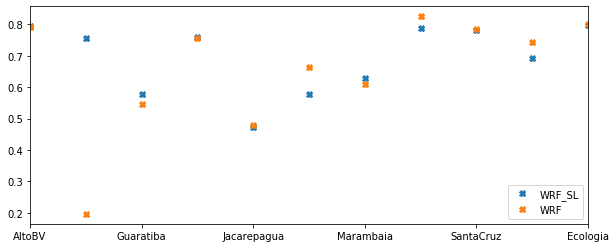

In [33]:
coefdeterm.plot(style = 'X', figsize = (10,4))
plt.xticks(range(coefdeterm2.shape[0]),coefdeterm2.index,rotation=60)

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(4,3,1)
x = df_cor.alto_da_boa_vista
y = df_wrf2.AltoBV
plot_g(x,y,'Alto da boa vista ')

plt.subplot(4,3,2)
x = df_inmet.f_copacabana
y = df_wrf2.FCopacabana
plot_g(x,y, 'Forte Copacabana')

plt.subplot(4,3,3)
x = df_cor.guaratiba
y = df_wrf2.Guaratiba
plot_g(x,y, 'Guaratiba')

plt.subplot(4,3,4)
x = df_cor.iraja
y = df_wrf2.Iraja
plot_g(x,y, 'Irajá')

plt.subplot(4,3,5)
x = df_inmet.jacarapagua
y = df_wrf2.Jacarepagua
plot_g(x,y,'Jacarepagua')

plt.subplot(4,3,6)
x = df_cor.jardim_botanico
y = df_wrf2.JardimB
plot_g(x,y, 'Jardim botanico')

plt.subplot(4,3,7)
x = df_inmet.marambaia
y = df_wrf2.Marambaia
plot_g(x,y, 'Marambaia')

plt.subplot(4,3,8)
x = df_cor.riocentro
y = df_wrf2.RioCentro
plot_g(x,y, 'Rio Centro')

plt.subplot(4,3,9)
x = df_cor.santa_cruz
y = df_wrf2.SantaCruz
plot_g(x,y, 'Santa Cruz')

plt.subplot(4,3,10)
x = df_inmet.xerem
y = df_wrf2.Xerem
plot_g(x,y, 'Xerem')


# R2  24 H

In [42]:
df_cor = df_cor.loc['2017-12-17 00:00:00': '2017-12-18 00:00:00']
df_inmet = df_inmet.loc['2017-12-17 00:00:00': '2017-12-18 00:00:00']
df_wrf = df_wrf.loc['2017-12-17 00:00:00': '2017-12-18 00:00:00']
df_wrf2 = df_wrf2.loc['2017-12-17 00:00:00': '2017-12-18 00:00:00']
df_wrf3 = df_wrf3.loc['2017-12-17 00:00:00': '2017-12-18 00:00:00']
fundao1 = Fundao.loc['2017-12-17 00:00:00': '2017-12-18 00:00:00'].resample('H').mean()


In [43]:
r2 = pd.DataFrame({
    'AltoBV':(np.corrcoef(df_cor.alto_da_boa_vista,df_wrf.AltoBV)[0,1])**2,
    'Fundao':(np.corrcoef(fundao1.temperatura,df_wrf.Fundao)[0,1])**2,
    'FCopacabana':(np.corrcoef(df_inmet.f_copacabana,df_wrf.FCopacabana)[0,1])**2,
    'Guaratiba': (np.corrcoef(df_cor.guaratiba,df_wrf.Guaratiba)[0,1])**2,
    'Iraja': (np.corrcoef(df_cor.iraja,df_wrf.Iraja)[0,1])**2,
    'Jacarepagua': (np.corrcoef(df_inmet.jacarapagua,df_wrf.Jacarepagua)[0,1])**2,
    'JardimBotanico': (np.corrcoef(df_cor.jardim_botanico, df_wrf.JardimB)[0,1])**2,
    'Marambaia': (np.corrcoef(df_inmet.marambaia, df_wrf.Marambaia)[0,1])**2,
    'Riocentro': (np.corrcoef(df_cor.riocentro, df_wrf.RioCentro)[0,1])**2,
    'SantaCruz':(np.corrcoef(df_cor.santa_cruz, df_wrf.SantaCruz)[0,1])**2,
    'Xerem': (np.corrcoef(df_inmet.xerem, df_wrf.Xerem)[0,1])**2,
    'Ecologia': (np.corrcoef(df_inmet.ecologia, df_wrf.Ecologia)[0,1])**2}, index = ['$R^2$'] )


r2_SL = r2.transpose()

r2 = pd.DataFrame({
    'AltoBV':(np.corrcoef(df_cor.alto_da_boa_vista,df_wrf2.AltoBV)[0,1])**2,
    'Fundao':(np.corrcoef(fundao1.temperatura,df_wrf2.Fundao)[0,1])**2,
    'FCopacabana':(np.corrcoef(df_inmet.f_copacabana,df_wrf2.FCopacabana)[0,1])**2,
    'Guaratiba': (np.corrcoef(df_cor.guaratiba,df_wrf2.Guaratiba)[0,1])**2,
    'Iraja': (np.corrcoef(df_cor.iraja,df_wrf2.Iraja)[0,1])**2,
    'Jacarepagua': (np.corrcoef(df_inmet.jacarapagua,df_wrf2.Jacarepagua)[0,1])**2,
    'JardimBotanico': (np.corrcoef(df_cor.jardim_botanico, df_wrf2.JardimB)[0,1])**2,
    'Marambaia': (np.corrcoef(df_inmet.marambaia, df_wrf2.Marambaia)[0,1])**2,
    'Riocentro': (np.corrcoef(df_cor.riocentro, df_wrf2.RioCentro)[0,1])**2,
    'SantaCruz':(np.corrcoef(df_cor.santa_cruz, df_wrf2.SantaCruz)[0,1])**2,
    'Xerem': (np.corrcoef(df_inmet.xerem, df_wrf2.Xerem)[0,1])**2,
    'Ecologia': (np.corrcoef(df_inmet.ecologia, df_wrf2.Ecologia)[0,1])**2}, index = ['$R^2$'] )
r2_ML = r2.transpose()

r2_c = pd.DataFrame({
    'AltoBV':(np.corrcoef(df_cor.alto_da_boa_vista,df_wrf3.AltoBV)[0,1])**2,
    'Fundao':(np.corrcoef(fundao1.temperatura,df_wrf3.Fundao)[0,1])**2,
    'FCopacabana':(np.corrcoef(df_inmet.f_copacabana,df_wrf3.FCopacabana)[0,1])**2,
    'Guaratiba': (np.corrcoef(df_cor.guaratiba,df_wrf3.Guaratiba)[0,1])**2,
    'Iraja': (np.corrcoef(df_cor.iraja,df_wrf3.Iraja)[0,1])**2,
    'Jacarepagua': (np.corrcoef(df_inmet.jacarapagua,df_wrf3.Jacarepagua)[0,1])**2,
    'JardimBotanico': (np.corrcoef(df_cor.jardim_botanico, df_wrf3.JardimB)[0,1])**2,
    'Marambaia': (np.corrcoef(df_inmet.marambaia, df_wrf3.Marambaia)[0,1])**2,
    'Riocentro': (np.corrcoef(df_cor.riocentro, df_wrf3.RioCentro)[0,1])**2,
    'SantaCruz':(np.corrcoef(df_cor.santa_cruz, df_wrf3.SantaCruz)[0,1])**2,
    'Xerem': (np.corrcoef(df_inmet.xerem, df_wrf3.Xerem)[0,1])**2,
     'Ecologia': (np.corrcoef(df_inmet.ecologia, df_wrf3.Ecologia)[0,1])**2},
    index = ['$R^2$'] )

r2_WRF = r2_c.transpose()


#coefdeterm2 = pd.concat([r2_SL,r2_ML, r2_WRF],axis=1)
#coefdeterm2.columns = ['WRF_SL','WRF_ML', 'WRF']

coefdeterm2 = pd.concat([r2_SL, r2_WRF],axis=1)
coefdeterm2.columns = ['WRF_SL', 'WRF']



In [44]:
coefdeterm2

,WRF_SL,WRF
AltoBV,0.854218,0.863617
Fundao,0.778792,0.812203
FCopacabana,0.760332,0.109002
Guaratiba,0.561502,0.494750
Iraja,0.886452,0.862315
Jacarepagua,0.744473,0.751896
JardimBotanico,0.475692,0.602684
Marambaia,0.631881,0.581179
Riocentro,0.852450,0.921409
SantaCruz,0.900387,0.930074


In [45]:
coefdeterm2.describe()

,WRF_SL,WRF
count,12.000000,12.000000
mean,0.738729,0.708434
std,0.144897,0.235260
min,0.475692,0.109002
25%,0.615495,0.597308
50%,0.769562,0.782049
75%,0.852892,0.862641
max,0.900387,0.930074


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

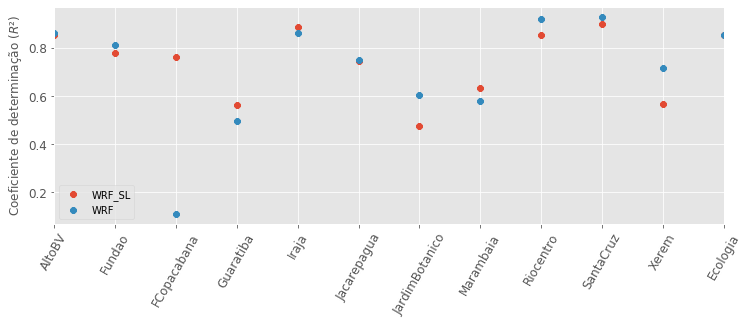

In [46]:
plt.style.use('ggplot')
coefdeterm2.plot(style = '8',fontsize = 12, figsize = (12,4))
plt.xticks(range(coefdeterm2.shape[0]),coefdeterm2.index,rotation=60)
#plt.xlabel('Estações')
plt.ylabel('Coeficiente de determinação ($R²$)')
plt.tight_layout
#plt.savefig('../graficos/r2_WRFs.png')

In [193]:
  coefdeterm2.describe()

,WRF_SL,WRF
count,12.000000,12.000000
mean,0.738729,0.708434
std,0.144897,0.235260
min,0.475692,0.109002
25%,0.615495,0.597308
50%,0.769562,0.782049
75%,0.852892,0.862641
max,0.900387,0.930074


In [162]:
import datetime

# create data
customdate = datetime.datetime(2017, 12, 17, 00, 00)
ytick = [ 2,4,6,8,10,12,14,16,18,20 ]
xtick = [customdate + datetime.timedelta(hours=i) for i in range(len(df_wrf))]


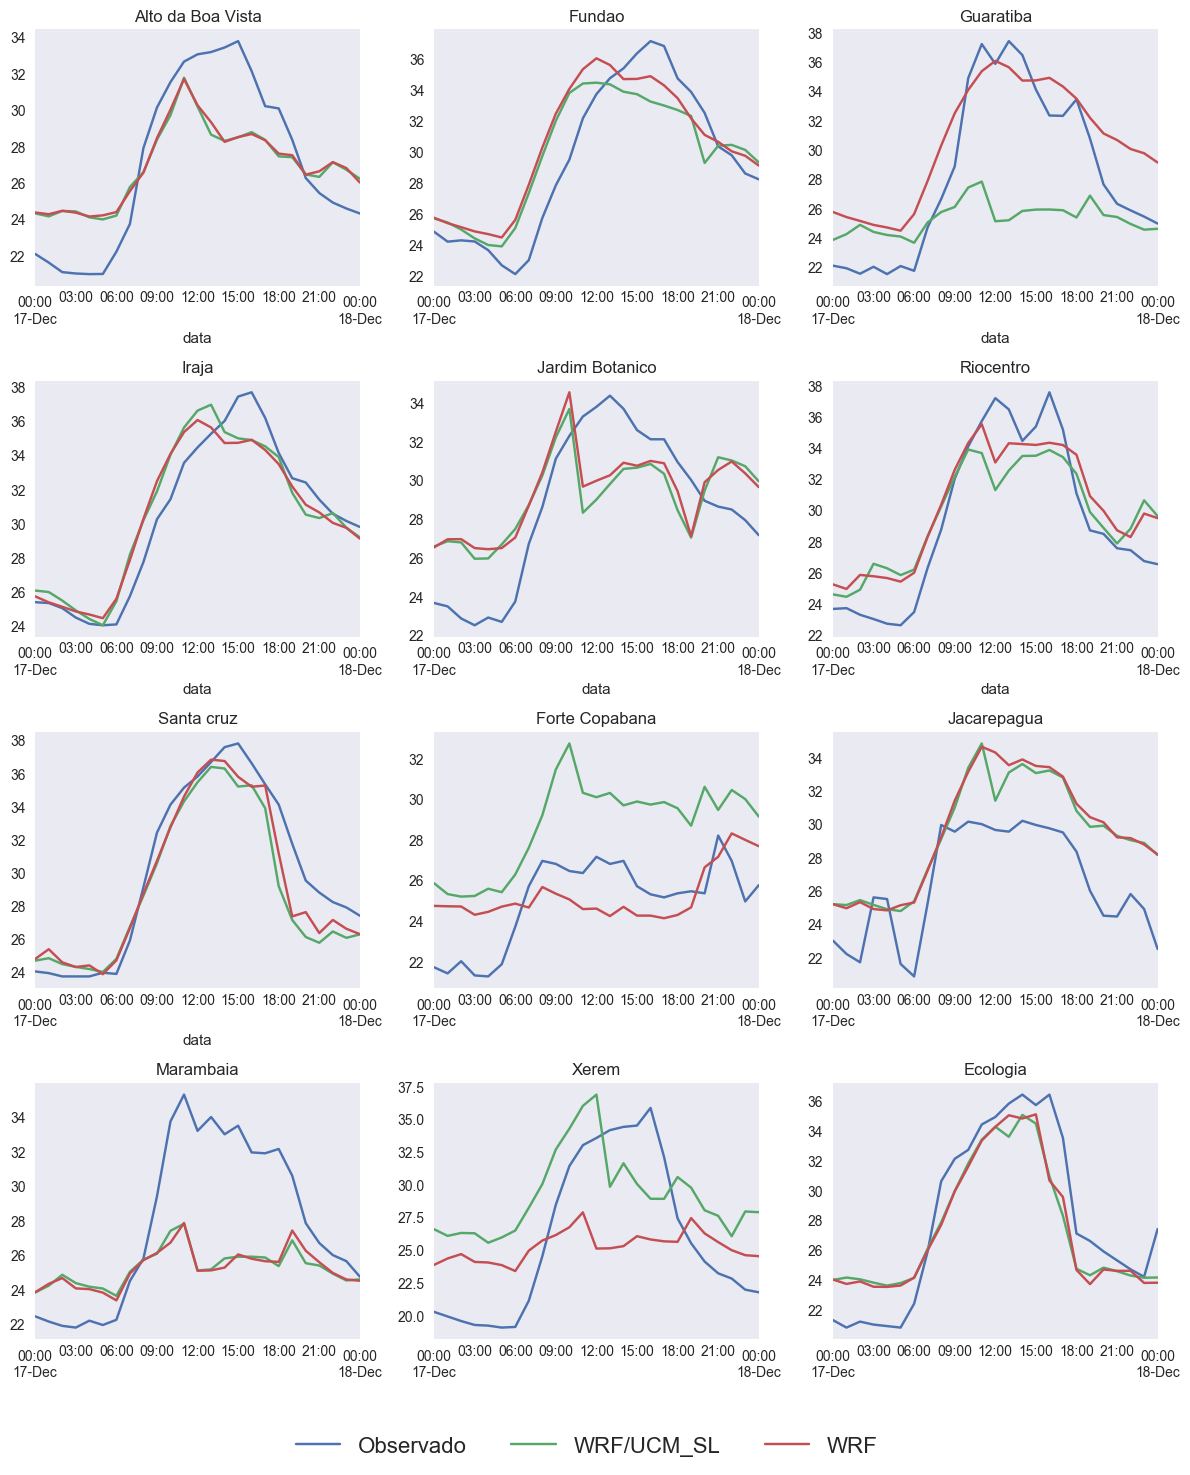

In [194]:
# Principal
plt.style.use('seaborn')
l1 = 'WRF/UCM_SL'
l2 = 'WRF/UCM_ML'
l3 = 'WRF'
plt.figure(figsize=(12,14))

plt.subplot(4,3,1)
plt.title('Alto da Boa Vista')
df_cor.alto_da_boa_vista.plot(label='Observado')
df_wrf.AltoBV.plot(label=l1)
df_wrf3.AltoBV.plot(label=l3)
#plt.legend()
#plt.tight_layout()
plt.grid()

plt.subplot(4,3,2)
plt.title('Fundao')
fundao1.temperatura.plot(label='Observado')
df_wrf.Fundao.plot(label=l1)
#df_wrf2.Fundao.plot(label=l2)
df_wrf3.Fundao.plot(label=l3)
#plt.legend()
plt.tight_layout()
plt.grid()


plt.subplot(4,3,3)
plt.title('Guaratiba')
df_cor.guaratiba.plot(label='Observado')
df_wrf.Guaratiba.plot(label=l1)
#df_wrf2.Guaratiba.plot(label=l2)
df_wrf3.Fundao.plot(label=l3)
#plt.legend()
plt.tight_layout()
plt.grid()

plt.subplot(4,3,4)
plt.title('Iraja')
df_cor.iraja.plot(label='Observado')
df_wrf.Iraja.plot(label=l1)
#df_wrf2.Iraja.plot(label=l2)
df_wrf3.Fundao.plot(label=l3)
#plt.legend()
plt.tight_layout()
plt.grid()

plt.subplot(4,3,5)
plt.title('Jardim Botanico')
df_cor.jardim_botanico.plot(label='Observado')
df_wrf.JardimB.plot(label=l1)
#df_wrf2.JardimB.plot(label=l2)
df_wrf3.JardimB.plot(label=l3)
#plt.legend()
plt.tight_layout()
plt.grid()

plt.subplot(4,3,6)
plt.title('Riocentro')
df_cor.riocentro.plot(label='Observado')
df_wrf.RioCentro.plot(label=l1)
#df_wrf2.RioCentro.plot(label=l2)
df_wrf3.RioCentro.plot(label=l3)
#plt.legend()
plt.tight_layout()
plt.grid()

plt.subplot(4,3,7)
plt.title('Santa cruz')
df_cor.santa_cruz.plot(label='Observado')
df_wrf.SantaCruz.plot(label=l1)
#df_wrf2.SantaCruz.plot(label=l2)
df_wrf3.SantaCruz.plot(label=l3)
#plt.legend()
#plt.tight_layout()
plt.grid()


plt.subplot(4,3,8)
plt.title('Forte Copabana')
df_inmet.f_copacabana.plot(label='Observado')
df_wrf.FCopacabana.plot(label=l1)
#df_wrf2.FCopacabana.plot(label=l2)
df_wrf3.FCopacabana.plot(label=l3)


#plt.legend()
#plt.tight_layout()
plt.grid()


plt.subplot(4,3,9)
plt.title('Jacarepagua')
df_inmet.jacarapagua.plot(label='Observado')
df_wrf.Jacarepagua.plot(label=l1)
#df_wrf2.Jacarepagua.plot(label=l2)
df_wrf3.Jacarepagua.plot(label=l3)
#plt.legend()
plt.tight_layout()
plt.grid()

plt.subplot(4,3,10)
plt.title('Marambaia')
df_inmet.marambaia.plot(label='Observado')
df_wrf.Marambaia.plot(label=l1)
#df_wrf2.Marambaia.plot(label=l2)
df_wrf3.Marambaia.plot(label=l3)

#plt.legend()
plt.tight_layout()
plt.grid()

plt.subplot(4,3,11)
plt.title('Xerem')
df_inmet.xerem.plot(label='Observado')
df_wrf.Xerem.plot(label=l1)
#df_wrf2.Xerem.plot(label=l2)
df_wrf3.Marambaia.plot(label=l3)

#plt.legend()
plt.tight_layout()
plt.grid()



ax = plt.subplot(4,3,12)
plt.title('Ecologia')
df_inmet.ecologia.plot(label='Observado')
df_wrf.Ecologia.plot(label=l1)
#df_wrf2.Ecologia.plot(label=l2)
df_wrf3.Ecologia.plot(label=l3)
#plt.legend()
plt.grid()


plt.legend(bbox_to_anchor=(0.2, -0.3),ncol=3,fontsize = 16)
#plt.tight_layout()
#plt.savefig('../graficos/wrf_estacoes.png',dpi=300)

In [47]:
maximor = pd.concat([df_inmet.max(),df_cor.min()], axis =0)

In [64]:
df_wrf.columns.values

array(['AltoBV', 'Fundao', 'Guaratiba', 'Iraja', 'JardimB', 'RioCentro',
       'SantaCruz', 'FCopacabana', 'Ecologia', 'Jacarepagua', 'Marambaia',
       'Xerem'], dtype=object)

In [69]:
import seaborn as sns

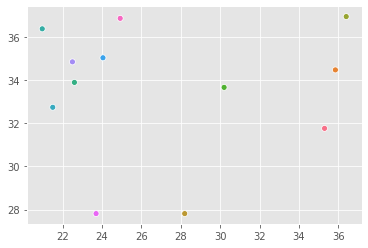

In [73]:

sns.scatterplot(x = maximor.values, y = df_wrf.max().values, 
                hue=df_wrf.columns.values,legend = False)

In [ ]:
df_cor.max()[0]

In [218]:
df_wrf.columns.values

array(['AltoBV', 'Fundao', 'Guaratiba', 'Iraja', 'JardimB', 'RioCentro',
       'SantaCruz', 'FCopacabana', 'Ecologia', 'Jacarepagua', 'Marambaia',
       'Xerem'], dtype=object)

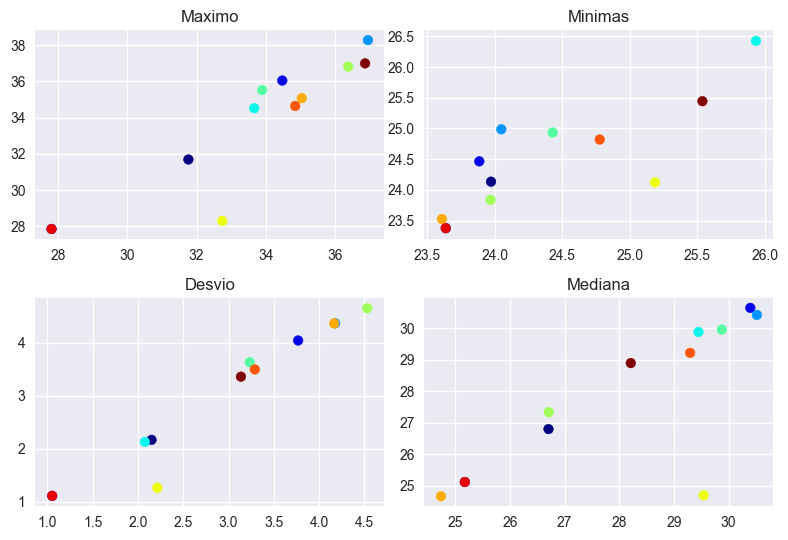

In [224]:
data1 = [df_wrf.max(),df_wrf.min(), df_wrf.std(), df_wrf.median()]

data2 = [df_wrf3.max(),df_wrf3.min(), df_wrf3.std(), df_wrf3.median()]
nomes = ['Maximo', 'Minimas', 'Desvio', 'Mediana']       
plt.figure()
for i in range(len(data1)):
    g= i+1
    plt.subplot(2,2,g)
    plt.title(nomes[i])
    plt.scatter(data1[i],data2[i],c=range(len(df_wrf.columns.values)),
                label = df_wrf.columns.values, cmap='jet')
    


plt.tight_layout()


In [203]:
df_wrf.max()


AltoBV         31.765
Fundao         34.476
Guaratiba      27.814
Iraja          36.949
JardimB        33.666
RioCentro      33.896
SantaCruz      36.381
FCopacabana    32.743
Ecologia       35.039
Jacarepagua    34.849
Marambaia      27.814
Xerem          36.867
dtype: float64

In [197]:
df_wrf.max()

AltoBV         31.765
Fundao         34.476
Guaratiba      27.814
Iraja          36.949
JardimB        33.666
RioCentro      33.896
SantaCruz      36.381
FCopacabana    32.743
Ecologia       35.039
Jacarepagua    34.849
Marambaia      27.814
Xerem          36.867
dtype: float64

# Dados do fundão

In [74]:
Fundao = pd.read_pickle('../dados_meteorologicos/Hfree_ev1.pk1')

In [75]:
# convertendo temperatura
Fundao.temperatura = Fundao.temperatura.apply(lambda x: x -273.15)
Fundao.head()

,Cn2,Ct2,H,pressao,temperatura,orvalho,radiacao,umidade,precipitacao,vel_vento,dir_vento
2017-12-16 00:00:00,1.113019e-11,11.732065,50.725937,101060.483746,23.504837,21.716614,0.0,89.556463,0.0,0.226130,181.332353
2017-12-16 00:05:00,1.226592e-11,12.914351,54.522639,101050.487616,23.404876,21.786587,0.0,90.456115,0.0,0.306099,59.779412
2017-12-16 00:10:00,9.812735e-12,10.324278,46.100493,101050.000000,23.352457,21.923119,0.0,91.593479,0.0,0.262457,160.773239
2017-12-16 00:15:00,9.403871e-12,9.887430,44.633401,101050.000000,23.302477,22.063065,0.0,92.743034,0.0,0.212477,273.179721
2017-12-16 00:20:00,9.085865e-12,9.539616,43.457727,101054.750387,23.204992,22.031997,0.0,92.990015,0.0,0.162496,300.126741


In [89]:
#corrigindo horario de verao
Fundao.index =pd.DatetimeIndex(start = '2017-12-16 01:00:00',periods = len(Fundao),
                               freq = '5min')

/home/pensario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [97]:
wrf_H = np.loadtxt('../WRF/fundao_h_wrf1.txt')
wrf2_H = np.loadtxt('../WRF/fundao_h_wrf2.txt')
wrf3_H = np.loadtxt('../WRF/wrf3/fundao_h_wrf3.txt')

In [99]:
H_wrf = pd.DataFrame({'wrf1':wrf_H, 'wrf2':wrf2_H, 'wrf3':wrf3_H})
H_wrf.index =pd.DatetimeIndex(start = '2017-12-15 21:00:00',periods = len(wrf_H),freq = '1H')

/home/pensario/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fde9d8cee48>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fde9d83b588>], dtype=object)

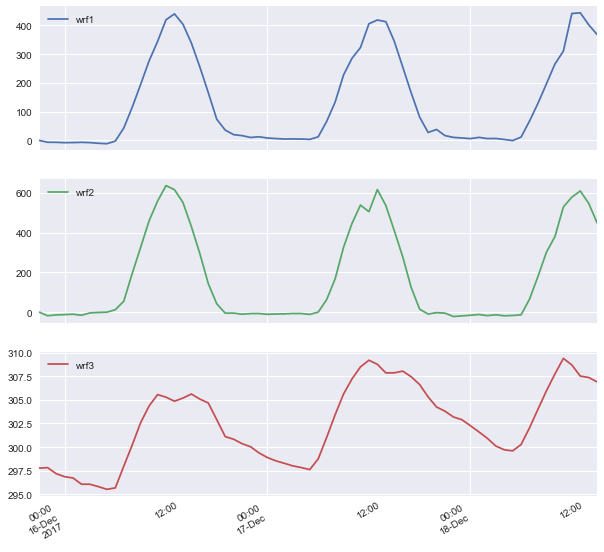

In [103]:
H_wrf.plot(subplots = True, figsize = (10,10))

In [90]:
H_wrf = H_wrf.loc['2017-12-16 01:00:00':'2017-12-18 15:00:00']

In [92]:
Fundao_H = Fundao.loc['2017-12-16 00:00:00':'2017-12-18 15:00:00']
Fundao_H = Fundao_H.resample('H').mean()

In [93]:
(np.corrcoef(Fundao_H.H,H_wrf.wrf1,'k.')[0,1])**2

0.91915244374189276

In [94]:
r2_score(Fundao_H.H,H_wrf.wrf1)

0.82874333929482047

In [95]:
r2_score(Fundao_H.H,H_wrf.wrf3)

-0.51522469656900904

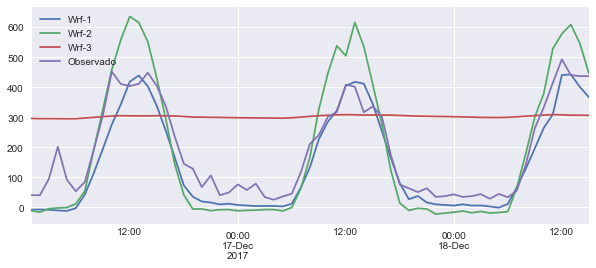

In [96]:
plt.style.use('seaborn')
plt.figure(figsize=(10,4))
H_wrf.wrf1.plot(label ='Wrf-1')
H_wrf.wrf2.plot(label ='Wrf-2')
H_wrf.wrf3.plot(label ='Wrf-3')
Fundao_H.H.plot(label = 'Observado')
plt.legend()

In [104]:
H_wrf = H_wrf.loc['2017-12-17 00:00:00': '2017-12-18 00:00:00']
Fundao_H = Fundao_H.loc['2017-12-17 00:00:00': '2017-12-18 00:00:00']

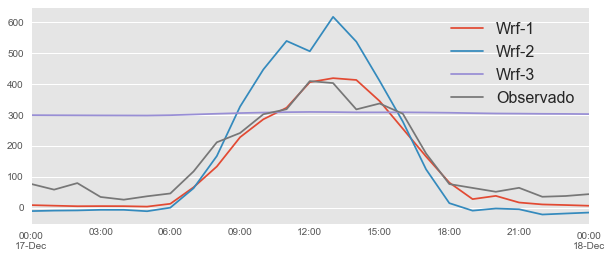

In [106]:
plt.style.use('ggplot')
plt.figure(figsize=(10,4))
H_wrf.wrf1.plot(label ='Wrf-1')
H_wrf.wrf2.plot(label ='Wrf-2')
H_wrf.wrf3.plot(label ='Wrf-3')
Fundao_H.H.plot(label = 'Observado')
plt.grid(b=True)
plt.legend(fontsize = 16)
#plt.savefig('../graficos/H_17122017.png')

In [137]:
(np.corrcoef(fundao_H.H,H_wrf.wrf1,'k.')[0,1])**2

0.9597604573582454

In [138]:
r2_score(fundao_H.H,H_wrf.wrf1)

0.8947547915153231